# Análise de dados sobre saúde do sono e estilo de vida

### Insights sobre padrões de sono e hábitos diários

# Visão geral do projeto:
O Sleep Health and Lifestyle Dataset fornece insights detalhados sobre os padrões de sono, hábitos diários e fatores de estilo de vida dos indivíduos. Essa etapa do projeto compreende dados já tratados e organizados para facilitar as análises. 

Essa análise tem como objetivo produzir insights a partir de métricas essenciais como duração do sono, qualidade do sono, níveis de atividade física, estresse, categoria de IMC, saúde cardiovascular e presença de distúrbios do sono.

# Fontes dos dados

Os dados foram obtidos no kaggle através do [link](https://www.kaggle.com/code/winterbearballu/sleep-health-and-lifestyle-eda)

Obs: este conjunto de dados é gerado sinteticamente e se destina exclusivamente a propósitos ilustrativos e educacionais. Ele visa fornecer uma estrutura realista para explorar e analisar correlações entre sono, hábitos de estilo de vida e métricas de saúde.

# Colunas do conjunto de dados:
- Gênero : Gênero do indivíduo (masculino/feminino).
- Ocupação : A profissão ou status de emprego do indivíduo (estudante, operacional, escritório e aposentado).
- Duração do sono (horas) : Total de horas de sono por dia.
- Qualidade do sono : Uma classificação subjetiva da qualidade do sono (Muito ruim, Ruim, Bom, Excelente).
- Nível de atividade física (minutos/dia) : Tempo gasto em atividade física diariamente em minutos.
- Nível de estresse : Uma classificação subjetiva do nível de estresse (Estresse elevado, Estresse moderado, Estresse muito alto, Baixo estresse).
- Categoria de IMC : Classificação do IMC do indivíduo (baixo peso, normal, sobrepeso, obeso).
- Frequência cardíaca (bpm) : frequência cardíaca em repouso em batimentos por minuto.
- Passos diários : Número de passos dados pelo indivíduo por dia.
- Distúrbio do sono : Presença de um distúrbio do sono (nenhum, insônia, apneia do sono).
- Faixa Etária: Idade do indivíduo em anos.
- Pressão arterial : Classificação da pressão arterial, mostrada em valores com base na Associação Brasileira de Cardiologia (Otima, Normal, Pre-hipertensao, Hipertensao).

# Detalhes sobre distúrbios do sono:
- Nenhum : O indivíduo não apresenta nenhum distúrbio específico do sono.
- Insônia : Caracterizada pela dificuldade de adormecer ou permanecer dormindo, muitas vezes resultando em sono inadequado.
- Apneia do sono : caracterizada por interrupções na respiração durante o sono, levando a sono interrompido e potenciais riscos à saúde.

# Importação de bibliotecas e extração da base

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import scikit_posthocs as sp

from scipy.stats import chi2_contingency, kruskal, levene, shapiro

from src.config import DADOS_TRATADOS

df_sono_parquet = pd.read_parquet(DADOS_TRATADOS)

In [8]:
# Visualização das 5 primeiras linhas

df_sono_parquet.head()

,Gênero,Ocupacao,DuracaoSono,QualidadeSono,NivelAtividadefísica,NivelEstresse,IMC,FrequenciaCardiaca,PassosDiarios,DisturbioSono,Faixa_etaria,ClassificacaoPressao
0,Masculino,Operacional,7.4,Bom,41,Estresse moderado,Obeso,91,8539,Nenhum,Jovem adulto,Normal
1,Feminino,Aposentado,4.2,Ruim,41,Estresse moderado,Obeso,81,18754,Nenhum,Adulto,Pre-hipertensao
2,Masculino,Aposentado,6.1,Ruim,107,Estresse moderado,AbaixoPeso,81,2857,Nenhum,Adulto,Normal
3,Masculino,Escritório,8.3,Excelente,20,Estresse elevado,Obeso,55,6886,Nenhum,Jovem adulto,Normal
4,Masculino,Aposentado,9.1,Excelente,19,Estresse moderado,AcimaPeso,97,14945,Insonia,Idoso,Pre-hipertensao


In [9]:
# Informações da base

df_sono_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gênero                400 non-null    category
 1   Ocupacao              400 non-null    category
 2   DuracaoSono           400 non-null    float64 
 3   QualidadeSono         400 non-null    category
 4   NivelAtividadefísica  400 non-null    int64   
 5   NivelEstresse         400 non-null    category
 6   IMC                   400 non-null    category
 7   FrequenciaCardiaca    400 non-null    int64   
 8   PassosDiarios         400 non-null    int64   
 9   DisturbioSono         400 non-null    category
 10  Faixa_etaria          400 non-null    category
 11  ClassificacaoPressao  400 non-null    category
dtypes: category(8), float64(1), int64(3)
memory usage: 16.0 KB


#### Observação: conforme apresentado acima, houve alterações de organização e limpeza:
- Dimensão: 12 colunas e 400 linhas
- Tamanho: 16.0KB (ganho de espaço)
- Ausência de valores nulos
- Alterações de formatos das colunas para formatos mais adequados

# Análise exploratória dos dados

## Classificação dos tipos de colunas em variáveis

In [13]:
colunas_numericas = df_sono_parquet.select_dtypes(include="number").columns.to_list()

colunas_numericas

['DuracaoSono', 'NivelAtividadefísica', 'FrequenciaCardiaca', 'PassosDiarios']

In [14]:
coluna_alvo = "DisturbioSono"

In [15]:
colunas_categoricas = set(df_sono_parquet.select_dtypes(include="category").columns.to_list()) - set(coluna_alvo)

colunas_categoricas.remove("DisturbioSono")

colunas_categoricas

{'ClassificacaoPressao',
 'Faixa_etaria',
 'Gênero',
 'IMC',
 'NivelEstresse',
 'Ocupacao',
 'QualidadeSono'}

# Colunas numéricas

Para análise exploratória, podemos prosseguir a partir de perguntas para basear a nossa análise. Iniciando pelas colunas numéricas, qual a influência dessas variáveis na incidência dos distúrbios de sono?

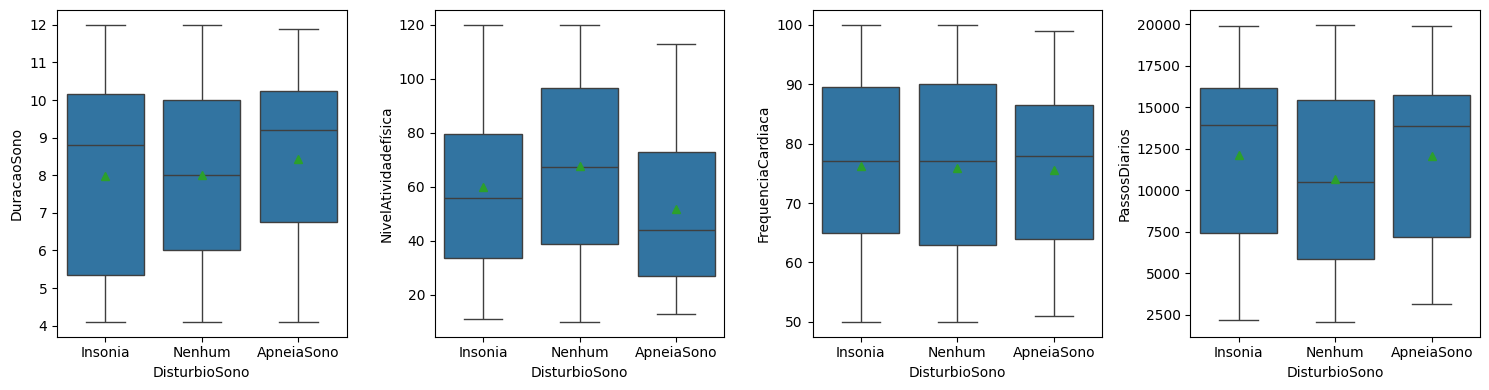

In [18]:
fig, axs = plt.subplots(1, 4, figsize=(15,4))

for ax, coluna in zip(axs, colunas_numericas):
    sns.boxplot(data=df_sono_parquet, x=coluna_alvo, y=coluna, showmeans=True, ax=ax)

plt.tight_layout()
plt.show()

Conforme pode ser observado no boxplot, podemos notar uma tendência na diferença entre os gráficos, especialmente nas variáveis Nível de atividade física e Passos Diários, com relação a ausência ou presença dos distúrbios de sono.

Agora, precisaremos verificar se essa diferença é estatísticamente significativa.

Entretanto, para verificar essa diferença, precisamos saber qual teste estatístico usar se será um teste paramétrico ou não-paramétrico e, para isso, precisamos determinar:
- Se obedece uma distribuição normal dos dados, utilizando uma análise gráfica e o teste de Shapiro-Wilk.
- Se os dados são homogêneos, a partir do teste de Levene.

### Análise gráfica para determinar distribuição normal

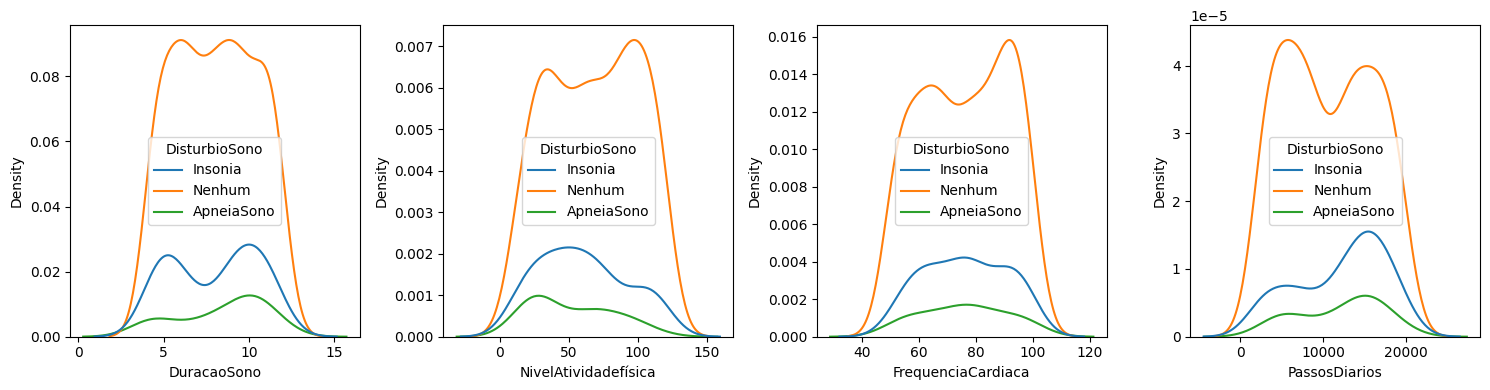

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

for ax, coluna in zip(axs, colunas_numericas):
    sns.kdeplot(data=df_sono_parquet, x=coluna, hue=coluna_alvo, ax=ax)
    
plt.tight_layout()
plt.show()

- Nesse gráfico de kde, o principal objetivo é verificar a distribuição dos dados, se representam uma curva de distribuição normal. Enquanto a altura da curva indica a quantidade de dados por disturbio de sono. 
- Conforme o observado, há mais pessoas sem nenhum disturbio de sono do que com algum tipo de problema avaliado.
- Com relação a distribuição, não é possível afirmar que se trata de uma curva de distruibuição normal, porém a distribuição gráfica permite realizarmos a análise de Shapiro-Wilk para ter certeza.

### Análise de Shapiro-Wilk

In [24]:
# Separação de valores dos disturbios relacionados as variáveis

colunas_numericas_disturbios = {
    f'{coluna}_{disturbio}' : df_sono_parquet[df_sono_parquet['DisturbioSono'] == disturbio][coluna] 
    for coluna in colunas_numericas 
    for disturbio in df_sono_parquet[coluna_alvo].unique()
}

In [25]:
# Verificar se o loop funcionou, se cada chave do dicionário associou a coluna ao disturbio

colunas_numericas_disturbios.keys()

dict_keys(['DuracaoSono_Nenhum', 'DuracaoSono_Insonia', 'DuracaoSono_ApneiaSono', 'NivelAtividadefísica_Nenhum', 'NivelAtividadefísica_Insonia', 'NivelAtividadefísica_ApneiaSono', 'FrequenciaCardiaca_Nenhum', 'FrequenciaCardiaca_Insonia', 'FrequenciaCardiaca_ApneiaSono', 'PassosDiarios_Nenhum', 'PassosDiarios_Insonia', 'PassosDiarios_ApneiaSono'])

In [26]:
# Realizando a análise de normalidade para verificar se os valores obedecem uma curva de distribuição normal

analise_normalidade = {
    nome_coluna: shapiro(valores, nan_policy="omit") 
    for nome_coluna, valores in colunas_numericas_disturbios.items()
}

analise_normalidade

{'DuracaoSono_Nenhum': ShapiroResult(statistic=np.float64(0.9502953681133725), pvalue=np.float64(2.3809549194556114e-08)),
 'DuracaoSono_Insonia': ShapiroResult(statistic=np.float64(0.9098329885499705), pvalue=np.float64(3.616625978097338e-05)),
 'DuracaoSono_ApneiaSono': ShapiroResult(statistic=np.float64(0.8831217191404234), pvalue=np.float64(0.002803974456639284)),
 'NivelAtividadefísica_Nenhum': ShapiroResult(statistic=np.float64(0.9480784322477107), pvalue=np.float64(1.33166311220171e-08)),
 'NivelAtividadefísica_Insonia': ShapiroResult(statistic=np.float64(0.9526712662205302), pvalue=np.float64(0.005275702542181957)),
 'NivelAtividadefísica_ApneiaSono': ShapiroResult(statistic=np.float64(0.9131941041208197), pvalue=np.float64(0.015637535620018454)),
 'FrequenciaCardiaca_Nenhum': ShapiroResult(statistic=np.float64(0.9396643865670086), pvalue=np.float64(1.667378236914509e-09)),
 'FrequenciaCardiaca_Insonia': ShapiroResult(statistic=np.float64(0.9559531460293413), pvalue=np.float64(

In [27]:
# Melhorando a visualização da análise de normalidade

df_normalidade = pd.DataFrame(analise_normalidade, index=["Valor_estatística", "Valor_p"]).T

df_normalidade

,Valor_estatística,Valor_p
DuracaoSono_Nenhum,0.950295,2.380955e-08
DuracaoSono_Insonia,0.909833,3.616626e-05
DuracaoSono_ApneiaSono,0.883122,2.803974e-03
NivelAtividadefísica_Nenhum,0.948078,1.331663e-08
NivelAtividadefísica_Insonia,0.952671,5.275703e-03
NivelAtividadefísica_ApneiaSono,0.913194,1.563754e-02
FrequenciaCardiaca_Nenhum,0.939664,1.667378e-09
FrequenciaCardiaca_Insonia,0.955953,8.200543e-03
FrequenciaCardiaca_ApneiaSono,0.954262,2.044047e-01
PassosDiarios_Nenhum,0.941729,2.728211e-09


In [28]:
# Visualização gráfica dos resultados

def grafico_resultados(dataframe, titulo_teste):
    dataframe["Valor_p"].plot.barh(figsize=(8, 5))
    plt.axvline(x=0.05, color="red", linestyle="--", label="p = 0.05")
    plt.legend()
    plt.title(f"Resultados - {titulo_teste}")
    plt.xlabel("Valor-p");

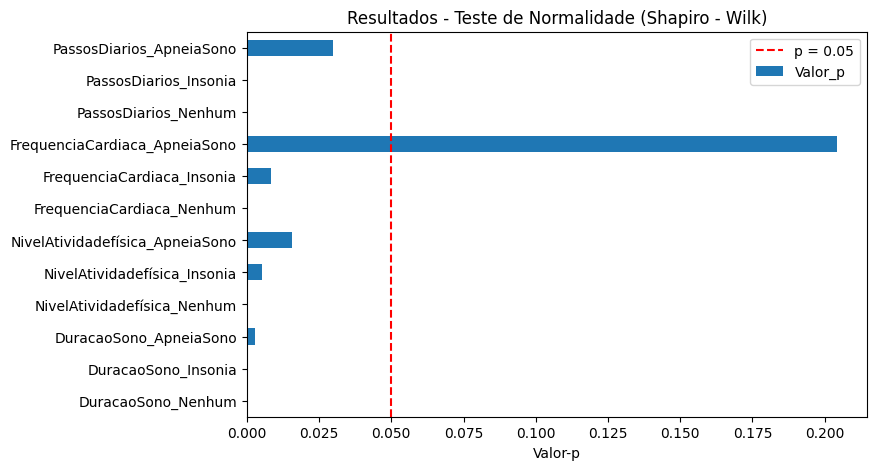

In [29]:
grafico_resultados(df_normalidade, "Teste de Normalidade (Shapiro - Wilk)")

Observação: Apenas a Frequencia Cardíaca apresentou a distribuição coindizente com um distribuição normal (p > 0.05).

### Análise de Levene

Como a análise de Levene necessita de mais uma sequência de valores, será necessário que realizemos um tratamento para que os valores de disturbio de sono sejam comparados para cada coluna numérica.

In [33]:
# Criamos a variável no qual será incluída os dados do loop

resultado_levene = {}

# Separamos os dados de distúrbio do sono para cada coluna

for coluna in colunas_numericas:
    grupo_nenhum = df_sono_parquet[df_sono_parquet['DisturbioSono'] == "Nenhum"][coluna]
    grupo_insonia = df_sono_parquet[df_sono_parquet['DisturbioSono'] == "Insonia"][coluna]
    grupo_apneia = df_sono_parquet[df_sono_parquet['DisturbioSono'] == "ApneiaSono"][coluna]

# Aplicamos o teste de Levene entre os disturbios para cada coluna em loop
    
    estatistica, valor_p = levene(grupo_nenhum, grupo_insonia, grupo_apneia, nan_policy="omit")

# Por último, inserimos o resultado na variável criada no início
    
    resultado_levene[coluna] = {"Estatística": estatistica, "Valor_p": valor_p}

resultado_levene

{'DuracaoSono': {'Estatística': np.float64(0.8230319338186035),
  'Valor_p': np.float64(0.4398461005291635)},
 'NivelAtividadefísica': {'Estatística': np.float64(0.8235649310241774),
  'Valor_p': np.float64(0.4396126940711331)},
 'FrequenciaCardiaca': {'Estatística': np.float64(1.1709328831715318),
  'Valor_p': np.float64(0.31114607161394114)},
 'PassosDiarios': {'Estatística': np.float64(1.215727389296623),
  'Valor_p': np.float64(0.29759564314133324)}}

In [34]:
# Dataframe da análise da homogeneidade

df_homogeneidade = pd.DataFrame(resultado_levene).T

df_homogeneidade

,Estatística,Valor_p
DuracaoSono,0.823032,0.439846
NivelAtividadefísica,0.823565,0.439613
FrequenciaCardiaca,1.170933,0.311146
PassosDiarios,1.215727,0.297596


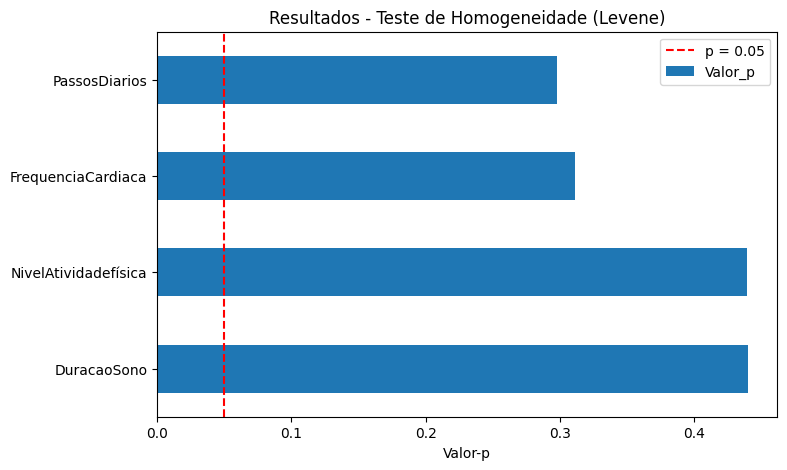

In [35]:
# Visualização gráfica dos resultados

grafico_resultados (df_homogeneidade, "Teste de Homogeneidade (Levene)")

Observação: em todas as colunas, os dados não apresentaram diferença significativa, indicando uma homogeneidade de variâncias (p > 0.05)

Até o momento, realizamos os seguintes testes:
- Shapiro-Wilk: os dados apresentaram diferença significativa (p < 0.05), indicando que não seguem uma distribuição normal, com exceção da Frequência Cardíaca (grupo ApneiaSono), que pode ser considerada uma distribuição normal.
- Levene: os dados não apresentaram diferença significativa (p > 0.05), indicando homogeneidade de variâncias.

Diante disso, é sugerido que seja realizado a análise estatística a partir de testes não-paramétricos.

### Teste de Kruskal-Wallis

O teste não-paramétrico escolhido foi de Kruskal-Wallis pois avaliaremos 3 ou mais amostras (Disturbios de sono)

In [40]:
resultado_kruskal = {}

for coluna in colunas_numericas:
    grupo_nenhum = df_sono_parquet[df_sono_parquet['DisturbioSono'] == "Nenhum"][coluna]
    grupo_insonia = df_sono_parquet[df_sono_parquet['DisturbioSono'] == "Insonia"][coluna]
    grupo_apneia = df_sono_parquet[df_sono_parquet['DisturbioSono'] == "ApneiaSono"][coluna]

    estatistica, valor_p = kruskal(grupo_nenhum, grupo_insonia, grupo_apneia, nan_policy="omit")

    resultado_kruskal[coluna] = {"Estatística": estatistica, "Valor_p": valor_p}

resultado_kruskal

{'DuracaoSono': {'Estatística': np.float64(0.7680554479393825),
  'Valor_p': np.float64(0.6811125437742669)},
 'NivelAtividadefísica': {'Estatística': np.float64(9.144845169339337),
  'Valor_p': np.float64(0.010332897053663054)},
 'FrequenciaCardiaca': {'Estatística': np.float64(0.02675563755978864),
  'Valor_p': np.float64(0.9867112665395339)},
 'PassosDiarios': {'Estatística': np.float64(5.2761135546320945),
  'Valor_p': np.float64(0.07150007521561769)}}

In [41]:
# Dataframe da análise da homogeneidade

df_kruskal = pd.DataFrame(resultado_kruskal).T

df_kruskal

,Estatística,Valor_p
DuracaoSono,0.768055,0.681113
NivelAtividadefísica,9.144845,0.010333
FrequenciaCardiaca,0.026756,0.986711
PassosDiarios,5.276114,0.071500


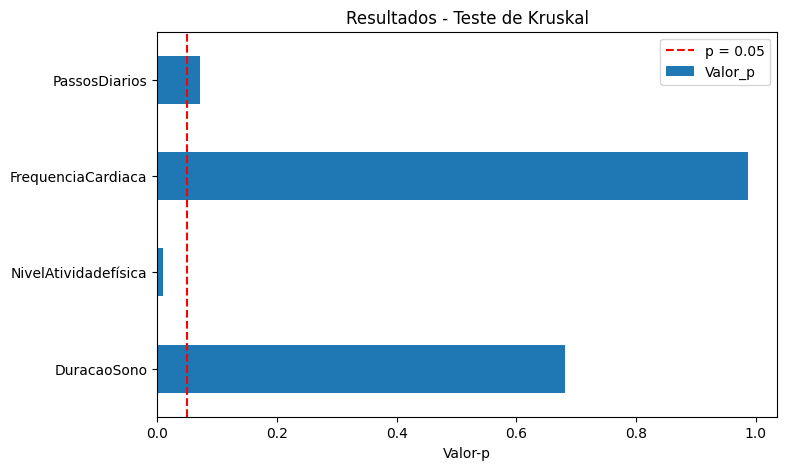

In [42]:
grafico_resultados(df_kruskal, "Teste de Kruskal")

Observação: conforme acima, apenas a variável NivelAtividadeFisica rejeita a hipótese nula (p < 0.05), indicando que existe diferença significativa entre os grupos de Distúrbio do Sono nessa variável. Ou seja, pelo menos um dos grupos se diferencia dos outros quanto ao nível de atividade física."

A partir disso, podemos concluir que **pode haver associação entre a atividade física e a presença de disturbios de sono**.

A documentação do teste de Kruskal ([link da documentação](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)), indica a realização do teste post-hoc para comparação entre os grupos de Disturbio de Sono para saber a diferença entre eles. Para isso, o escolhido foi o teste post-hoc de Dunn.

### Teste de Dunn

E um teste post-hoc não paramétrico usado após o Kruskal-Wallis, justamente para descobrir quais pares de grupos são diferentes

In [46]:
sp.posthoc_dunn(
    df_sono_parquet, 
    val_col= "NivelAtividadefísica", 
    group_col= "DisturbioSono", 
    p_adjust='bonferroni'
)

,Insonia,Nenhum,ApneiaSono
Insonia,1.000000,0.182557,0.677085
Nenhum,0.182557,1.000000,0.026548
ApneiaSono,0.677085,0.026548,1.000000


Observação: a partir do teste Post-Hoc de Dunn, observamos que há diferença significativa (p < 0.05) entre o grupo Apneia do sono e Nenhum.

Isso indica que mediante aos dados apresentados, sugere-se que **pode haver uma relação entre a prática de exercícios e a presença da Apneia do sono**

Entretanto, é necessário mais estudos para afirmar essa diferença.

# Colunas Categóricas

In [49]:
# Nessa etapa, iniciaremos verificando de forma geral as categorias

In [50]:
df_sono_parquet.describe(exclude="number").T.sort_values(by="freq", ascending=False)

,count,unique,top,freq
DisturbioSono,400,3,Nenhum,290
QualidadeSono,400,4,Ruim,205
Gênero,400,2,Feminino,201
ClassificacaoPressao,400,4,Normal,159
NivelEstresse,400,3,Estresse moderado,155
Faixa_etaria,400,4,Adulto,144
Ocupacao,400,4,Estudante,110
IMC,400,4,AcimaPeso,109


## Relacionando colunas categóricas e coluna-alvo

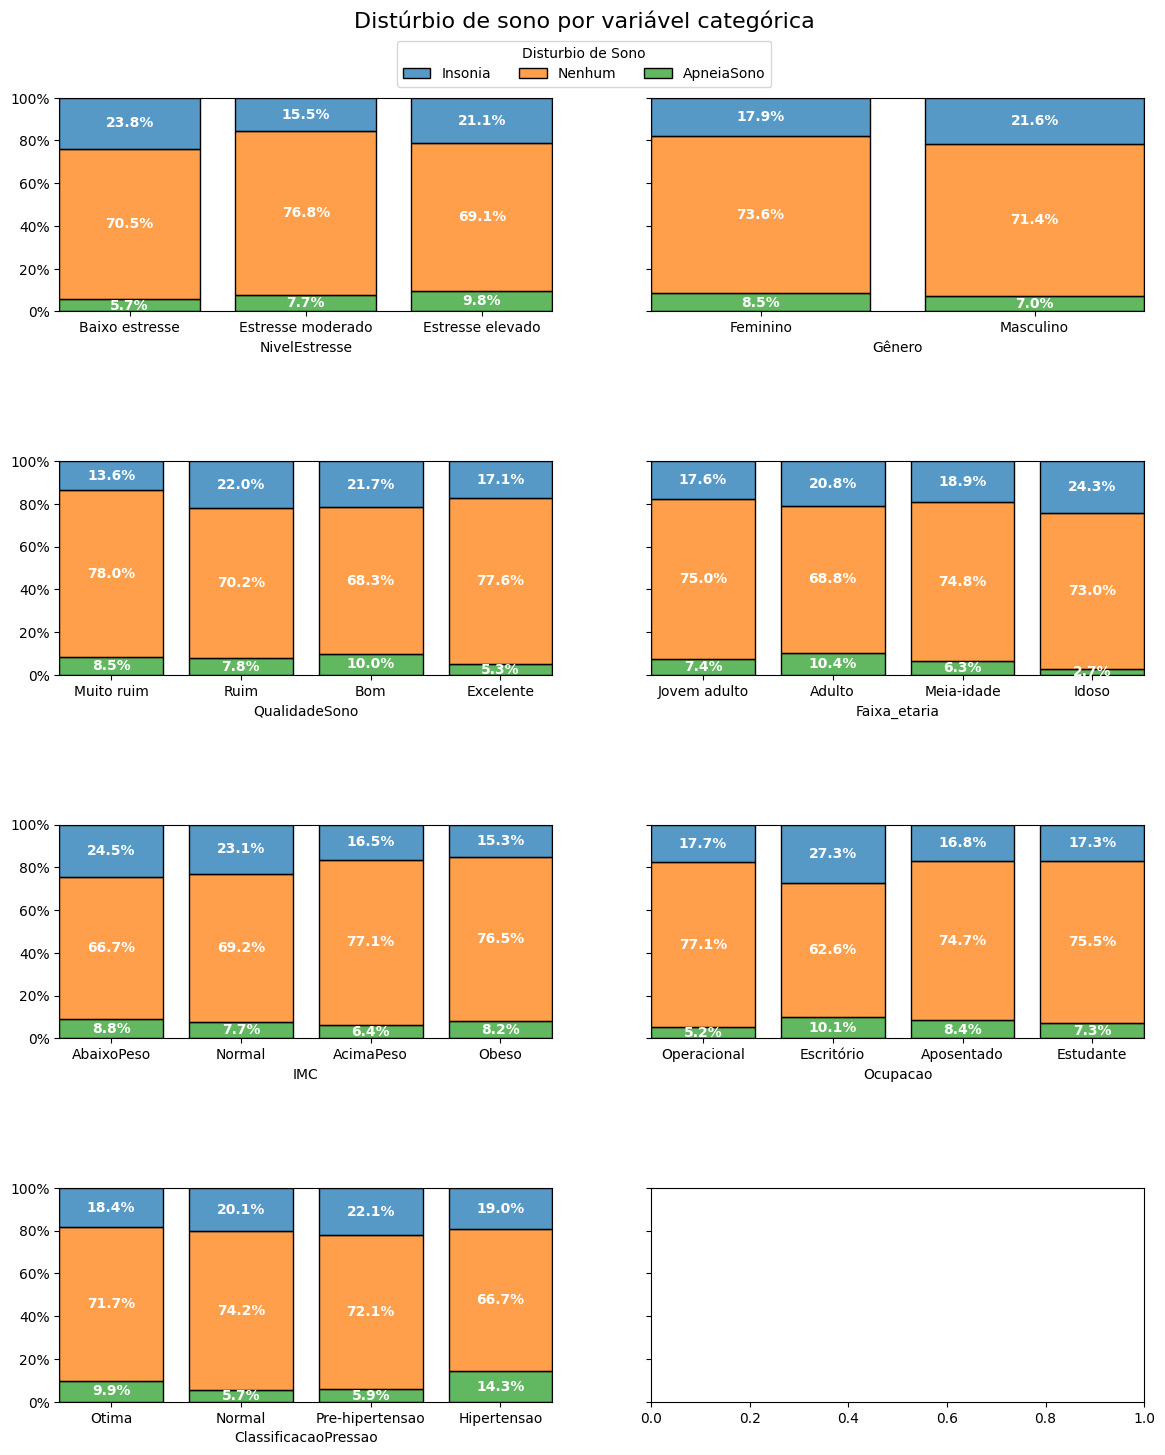

In [52]:
# Verificando a relação entre colunas categoricas e disturbios do sono a partir dos gráficos

from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 16), sharey=True)

for i, coluna in enumerate(colunas_categoricas):
    h = sns.histplot(x=coluna,
                     hue=coluna_alvo,
                     data=df_sono_parquet,
                     multiple='fill',
                     ax=axs.flat[i],
                     stat='percent',
                     shrink=0.8)
    h.tick_params(axis='x', labelrotation=0)

    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')

    for bar in h.containers:
        h.bar_label(bar, label_type='center', labels=[f'{b.get_height():.1%}' for b in bar], color='white', weight='bold')

    legend = h.get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=3, title='Disturbio de Sono', bbox_to_anchor=(0.5, 0.965))
fig.suptitle('Distúrbio de sono por variável categórica', fontsize=16)

fig.align_labels()

plt.subplots_adjust(wspace=0.2, hspace=0.7, top=0.925)

plt.show()

#### A partir dos gráficos apresentados acima podemos destacar:

- Trabalhadores de **escritório** com uma tendência de apresentar uma maior proporção de distúrbios de sono - **insônia (27,3%) e apneia do sono (10.1%)** - em relação as demais tipos de ocupação.
- Maior proporção de **idosos** com **insônia** (24,3%).
- Maior proporção de pessoas com **hipertensão** e **apneia do sono** (14,3%).
- Maior proporção de pessoas com nível de **estresse elevado** e **apneia do sono** (9,8%).
- **Mulheres** com maior proporção de **apneia do sono** (8,5%), enquanto **homens** com **insônia** (21,6%)
- Pessoas com **qualidade do sono ruim** são as que mais apresentaram problemas com **insônia** (22%) 
- Pessoas com **IMC abaixo do peso**, apresentaram maiores proporções de **insônia e apneia do sono** (24,5 e 8,8%, respectivamente).

Observação: a diferença mais nítida entre as relações destacadas foi com os trabalhadores de escritório quanto a presença dos distúrbios. Por esse motivo, vamos avaliar mais especificamente a coluna ocupação.

## Relacionando as colunas categóricas entre si

In [56]:
# Relacionando a Ocupação ao nível de estresse

nivelestresse_ocupacao = pd.crosstab(
    df_sono_parquet["Ocupacao"],
    df_sono_parquet["NivelEstresse"], 
    normalize="columns",
).T*100

nivelestresse_ocupacao

Ocupacao,Operacional,Escritório,Aposentado,Estudante
NivelEstresse,,,,
Baixo estresse,27.868852,17.213115,25.409836,29.508197
Estresse moderado,20.645161,27.096774,24.516129,27.741935
Estresse elevado,24.390244,29.268293,21.138211,25.203252


In [57]:
# Verificando na forma gráfica

def grafico_categoricas(coluna1, coluna2, normalize="columns"):

    df_crosstab = pd.crosstab(
        df_sono_parquet[coluna1],
        df_sono_parquet[coluna2], 
        normalize=normalize,
    ).T*100
    
    fig, ax = plt.subplots()
    
    df_crosstab.plot(kind="bar", figsize=(10, 4), ax=ax)
    plt.title(f'Distribuição de {coluna2} por {coluna1}')
    plt.legend(title=coluna1, loc='upper center', bbox_to_anchor=(1.1, 1.0))
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.yaxis.set_visible(False)
    
    plt.xticks(rotation=0)
    
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + 0.1,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontsize=6
                )
    plt.tight_layout()
    plt.show()

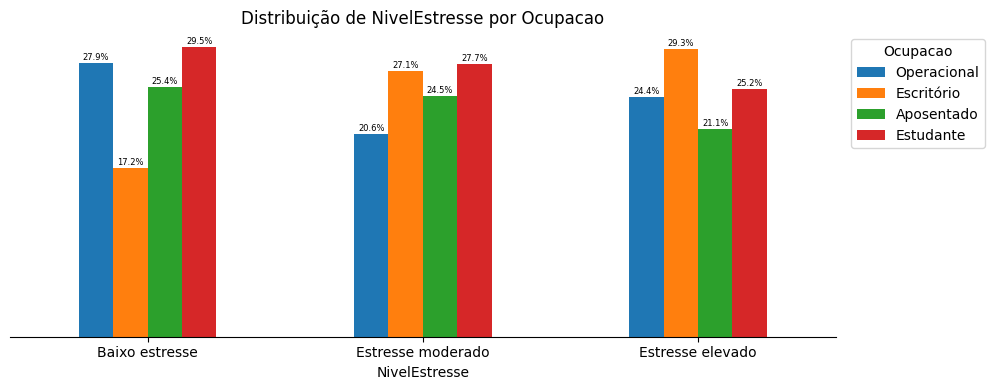

In [58]:
grafico_categoricas("Ocupacao", "NivelEstresse")

Observação: conforme acima, pode-se destacar que os maiores índices de **estresse elevado** ocorrem com pessoas que trabalham no **escritório (29,3%)**, enquanto nos demais tipos de ocupação, o que prevalece é a percepção de estresse baixo para as outras categorias de ocupação. Além disso, vale ressaltar que a proporção de pessoas com esse comportamento do estresse para trabalhadores de escritório aumenta conforme se aumenta o nível de estresse, enquanto nos demais se reduz predominantemente.

Lembrando que a **ocupação escritório** foi a que apresentou maiores quantidades de pessoas com **insônia (27,3%) e apneia do sono (10.1%)** e o nível de estresse elevado com **apneia do sono** (**9.8%**)

Em seguida, verificaremos se esse estresse elevado de trabalhadores de escritório pode estar relacionado a qualidade do sono.

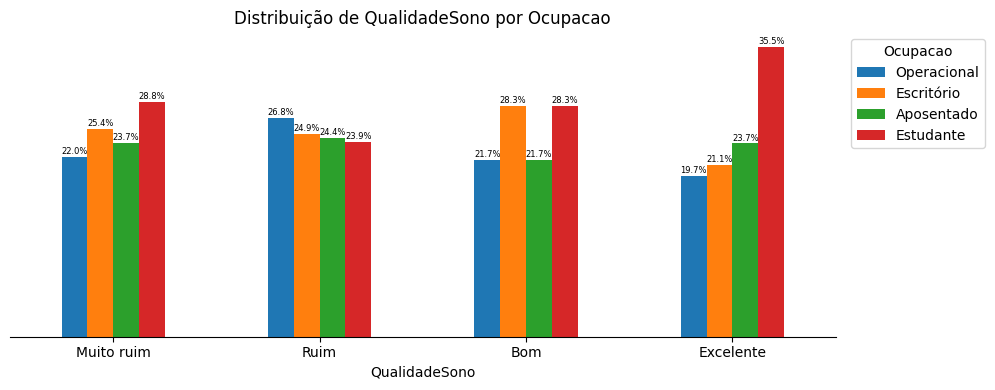

In [60]:
# Ainda verificando a coluna ocupação, veremos se há relação com a qualidade do sono

grafico_categoricas("Ocupacao", "QualidadeSono")

Observação: é possível notar que as maiores proporções de qualidade do sono **excelente** e **muito ruim** (**35.5 e 28.8%, respectivamente**) são de **estudantes**. Enquanto que trabalhadores de **escritório** aparecem na sequência quanto a **qualidade do sono muito ruim** (**25.4%**).

Com isso, vamos verificar se esses valores possuem alguma relação o IMC.

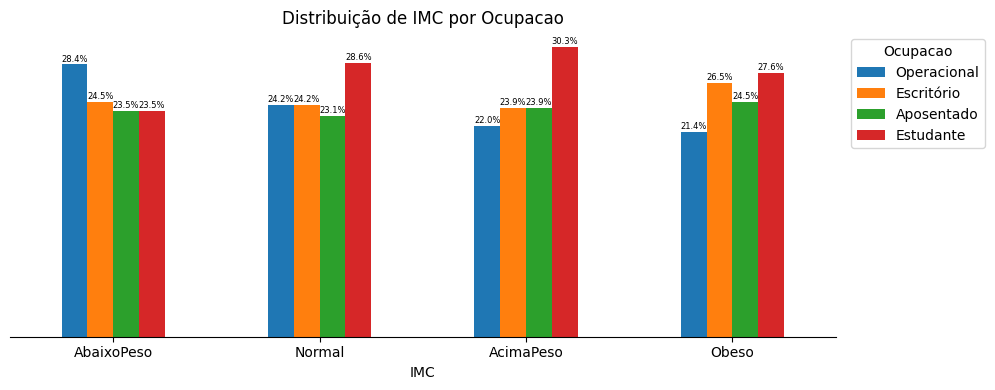

In [62]:
# Relação entre a ocupação e o IMC

grafico_categoricas("Ocupacao", "IMC")

Observação: conforme resultados acima, ressalta-se uma maior proporção de **estudantes** com **IMC obeso** ou **acima do peso** (**27.6 e 30.3%**). Outro dado importante é a relação entre IMC obeso e trabalhadores do **Escritório** (**24.5%**)

Portanto, os **estudantes**, apesar de possuírem o maior **nível de estresse baixo** (**29.5%**), apresentam a maior proporção dentre as pessoas que apresentam **qualidade do sono muito ruim** (**28.8%**) e o **IMC obeso** e **acima do peso**.

Além disso, trabalhadores de **escritório** apresentam maior proporção de **nível de estresse elevado** (**29.3%**) e o 2° em relação a **qualidade do sono muito ruim** (**25.4%**) e obesidade, atrás apenas dos estudantes.

Vamos agora relacionar o IMC a pressão arterial para verificar se o peso influencia na pressão arterial.

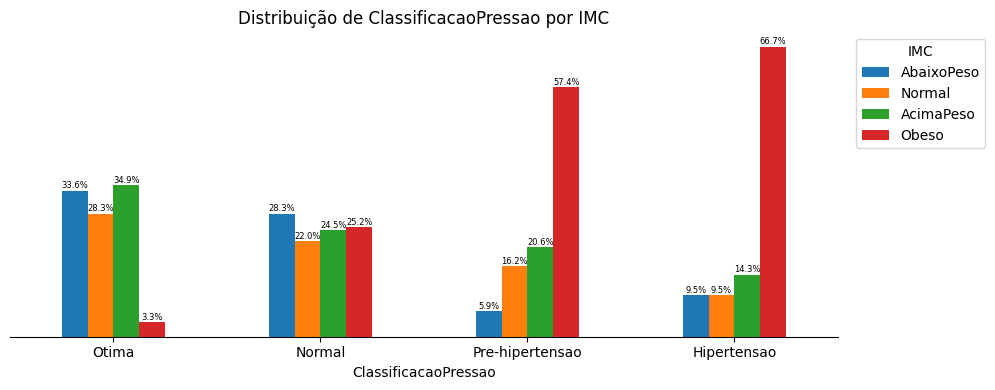

In [65]:
# Relação entre a IMC e a Pressão arterial

grafico_categoricas("IMC", "ClassificacaoPressao")

Observação: nessa análise verifica-se que o IMC **obeso** tem uma proporção expressiva para **pre-hipertensão e hipertensão** (**57.4 e 66.7%, respectivamente**), nota-se que para o IMC **obeso** a proporção de pessoas é maior, enquanto as demais faixas de IMC essa proporção diminui com o aumento de pressão arterial.



Diante desses resultados, veremos se há alguma influência pela idade.

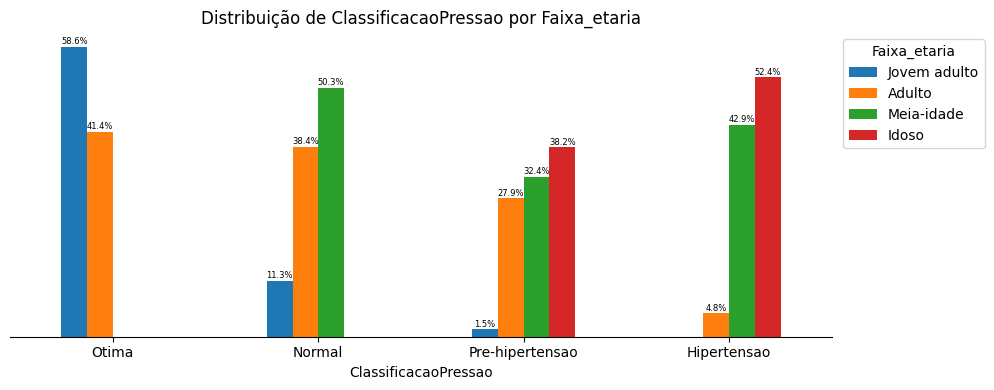

In [67]:
# Relação entre a Idade e a Pressão arterial

grafico_categoricas("Faixa_etaria", "ClassificacaoPressao")

Observação: é evidente também a relação proporcional entre **idosos** e as **classificações de pressão arterial pré-hipertensão e hipertensão** (**38.2 e 52.4%, respectivamente**) e o contrário também é notável, quantidade expressiva de **jovem adulto e adulto** com a **pressão arterial ótima** (**58.6 e 41.4%**).

Conforme mencionando anteriormente, **pré-hipertensão** estava proporcionalmente associado a **insônia** em **22.1%** e, **hipertensão**, à **apneia do sono** em **14.3%**.

Agora, veremos se a faixa etária pode influenciar na questão da qualidade do sono.

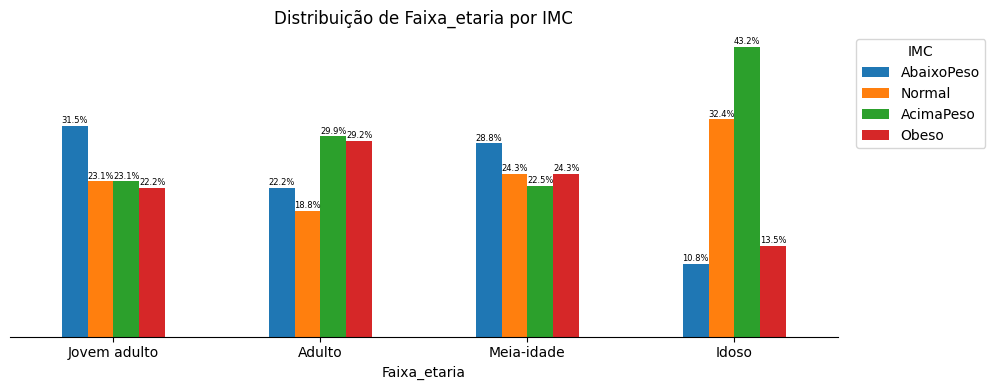

In [69]:
# Relação entre a Idade e a Qualidade do sono

grafico_categoricas("IMC","Faixa_etaria")

Observação: nessa distribuição identifica-se que há mais **idosos** e **adultos** com **IMC acima do peso** (43.2 e 29.9%, respectivamente). Para **adultos**, o **IMC obeso** aparece na sequência com **29.2%**.

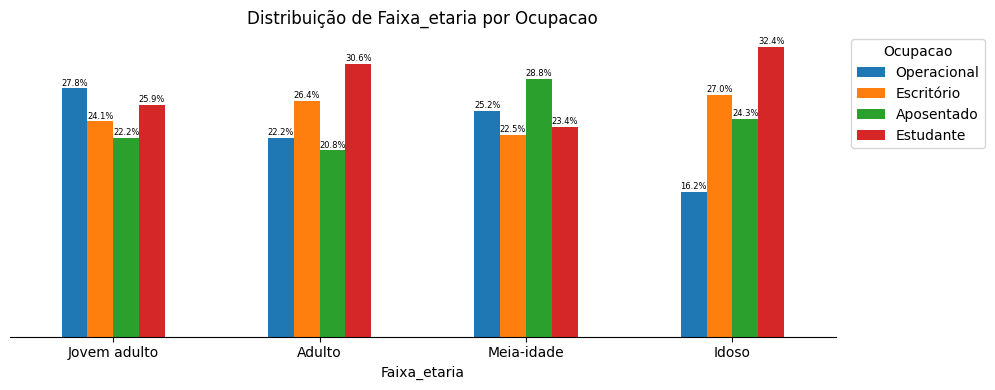

In [71]:
# Relação entre Faixa Etária por Ocupação.

grafico_categoricas("Ocupacao","Faixa_etaria")

Observação: nesse gráfico pode-se notar que **idosos e adultos** predominam a ocupacao de **estudantes** (**32.4 e 30.6%, respectivamente**), seguido por trabalhadores de **escritório** (**27.0 e 26.4%**). Além disso, vale destacar a maior proporção de **jovem adulto** em atividades **operacionais**.

Esses dados podem corroborar com um dado já observado anteriormente, em que **estudantes** e **idosos** apresentaram maior predominância no **IMC acima do peso** (**30.3 e 43.2%**), pois a maior parte de **idosos** são **estudantes** (**32.4%**).

Veremos agora a relação entre faixa etária e qualidade do sono.

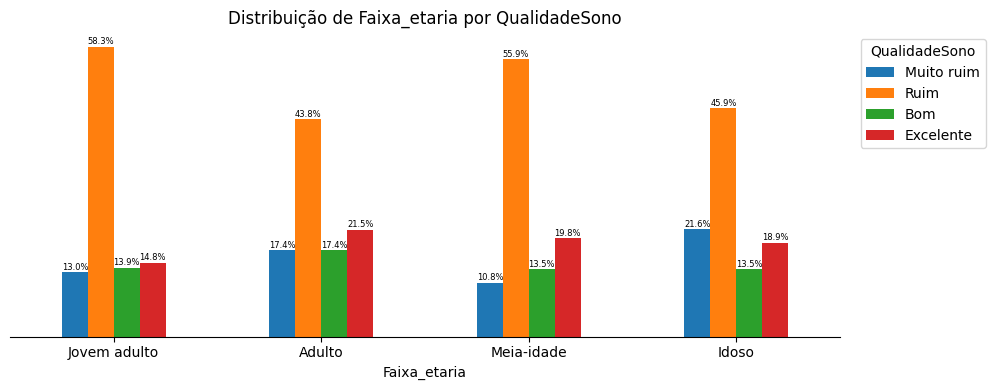

In [73]:
# Relação entre Faixa Etária e Qualidade do sono.

grafico_categoricas("QualidadeSono","Faixa_etaria")

Observação: pode-se notar um número expressivo de **qualidade do sono ruim** com destaque para **jovens adultos** (**58.3%**). 

Entretanto, se selecionarmos a **qualidade do sono muito ruim** é a segunda mais recorrente em **idosos** com **21.6%**, corroborando com a **qualidade de sono muito ruim** que foi obtida quando avalimos a **qualidade de sono de estudantes** (**28.8%**).

Relacionando com os distúrbios de sono, **insônia** se apresentou com uma maior proporção dentre as pessoas **idosas** (**24.3%**) e com relação aos **estudantes** a proporção foi de **17.7%**.

Por último, avaliaremos a relação das colunas com gênero.

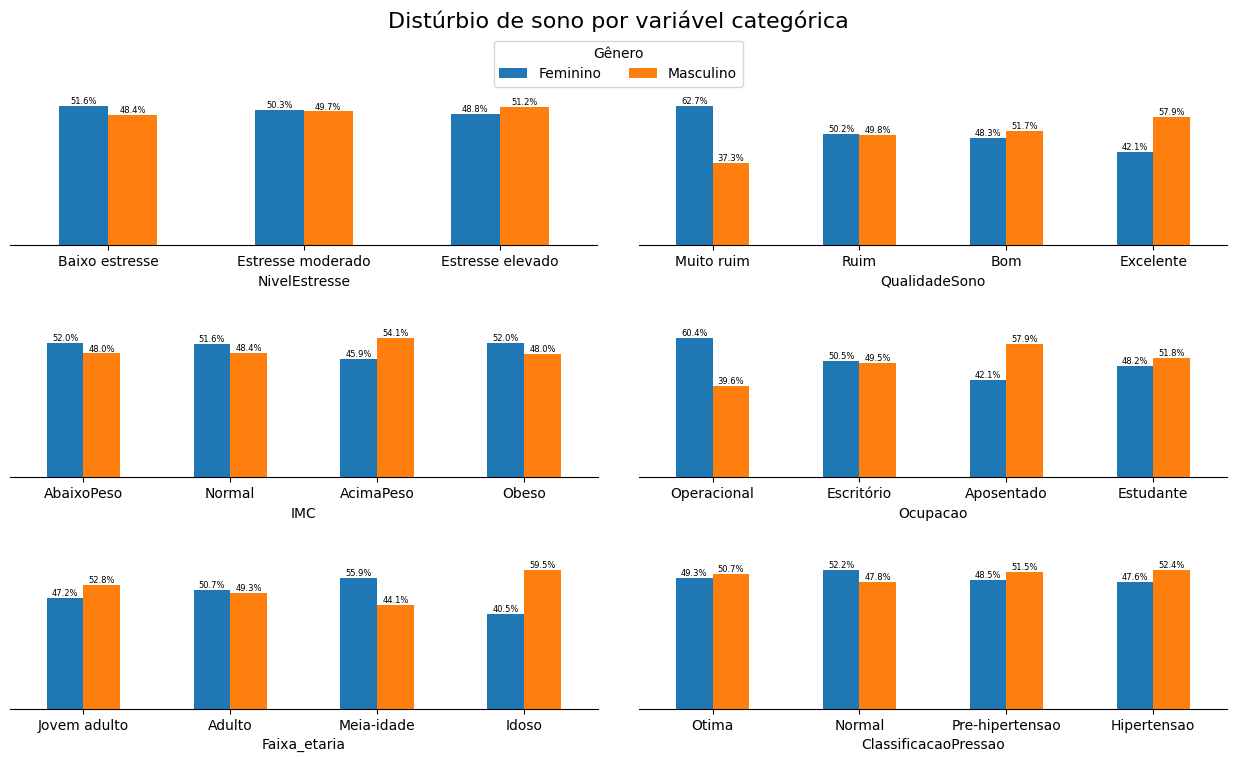

In [75]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 8))

colunas_categoricas_avaliadas = ["NivelEstresse", "QualidadeSono", "IMC", "Ocupacao", "Faixa_etaria", "ClassificacaoPressao"]

axs = axs.flatten()

# Variáveis para armazenar handles e labels da legenda
handles = labels = None

for i, coluna in enumerate(colunas_categoricas_avaliadas):
    ax = axs[i]
    
    df_crosstab = pd.crosstab(
        df_sono_parquet["Gênero"],
        df_sono_parquet[coluna], 
        normalize="columns",
    ).T * 100

    bar_plot = df_crosstab.plot(kind="bar", legend=False, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    axs[i].spines.right.set_visible(False)
    axs[i].spines.top.set_visible(False)
    axs[i].spines.left.set_visible(False)
    axs[i].yaxis.set_visible(False)
    
    # Captura a legenda apenas do primeiro gráfico
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()
                
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + 0.1,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontsize=6
                )

# Adiciona legenda compartilhada
fig.legend(handles=handles, labels=labels, loc='upper center', ncols=2, title='Gênero', bbox_to_anchor=(0.5, 0.950))
fig.suptitle('Distúrbio de sono por variável categórica', fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()

Observação: 
- **Homens** são mais predominantes em **nível de estresse elevado** (**51,2%**);
- **Mulheres** são mais predominantes em **qualidade do sono ruim** (**62.7%**);
- A proporção de **mulheres** é maior em **IMC abaixo do peso, normal e obeso** (**52, 51.6 e 52%, respectivamente**), enquanto que de **homens** são maiores em **acima do peso** (**54.1%**);
- Mais **mulheres** trabalham em **ocupações operacionais e escritório** (**60.4 e 50.5%, respectivamente**), enquanto que **homens** são mais numerosos em **aposentados e estudantes** (**57.9 e 51.8%, respectivamente**);
- **Homens** são mais predominantes na **faixa etária idoso e jovem adulto** (**59.5 e 52.8%**), enquanto que **mulheres** em **adulto e meia-idade** (**50.7 e 55.9%**);
- Quanto a **pressão arterial**, as **mulheres** possuem normal em maior quantidade (52.2%) e os **homens** nas demais classificações (**otima, pré-hipertensão e hipertensão - 50.7, 51.5 e 52.4%, respectivamente**)

Toda análise até esse momento foi na busca de relações entre as variáveis categóricas e a coluna alvo e, dessas com elas mesmas. A partir de agora, veremos se há diferença estatística entre as variáveis.

## Análise estatística de colunas categóricas

Para a análise estatística, utilizaremos o teste Qui-quadrado a partir de tabelas de contingência.

In [80]:
# Criando tabelas de contingência

tabelas_contingencia = {}

for coluna in colunas_categoricas:
    tabelas_contingencia[coluna] = pd.crosstab(
        df_sono_parquet[coluna_alvo],
        df_sono_parquet[coluna])

In [81]:
# Mostrar tabelas de contingência

for coluna in colunas_categoricas:
    display(
        pd.crosstab(
            df_sono_parquet[coluna_alvo],
            df_sono_parquet[coluna],
            margins=True,
            margins_name="Total",
            normalize="index"
        ).T*100
    )

DisturbioSono,Insonia,Nenhum,ApneiaSono,Total
NivelEstresse,,,,
Baixo estresse,36.708861,29.655172,22.580645,30.50
Estresse moderado,30.379747,41.034483,38.709677,38.75
Estresse elevado,32.911392,29.310345,38.709677,30.75


DisturbioSono,Insonia,Nenhum,ApneiaSono,Total
Gênero,,,,
Feminino,45.56962,51.034483,54.83871,50.25
Masculino,54.43038,48.965517,45.16129,49.75


DisturbioSono,Insonia,Nenhum,ApneiaSono,Total
QualidadeSono,,,,
Muito ruim,10.126582,15.862069,16.129032,14.75
Ruim,56.962025,49.655172,51.612903,51.25
Bom,16.455696,14.137931,19.354839,15.00
Excelente,16.455696,20.344828,12.903226,19.00


DisturbioSono,Insonia,Nenhum,ApneiaSono,Total
Faixa_etaria,,,,
Jovem adulto,24.050633,27.931034,25.806452,27.00
Adulto,37.974684,34.137931,48.387097,36.00
Meia-idade,26.582278,28.620690,22.580645,27.75
Idoso,11.392405,9.310345,3.225806,9.25


DisturbioSono,Insonia,Nenhum,ApneiaSono,Total
IMC,,,,
AbaixoPeso,31.645570,23.448276,29.032258,25.50
Normal,26.582278,21.724138,22.580645,22.75
AcimaPeso,22.784810,28.965517,22.580645,27.25
Obeso,18.987342,25.862069,25.806452,24.50


DisturbioSono,Insonia,Nenhum,ApneiaSono,Total
Ocupacao,,,,
Operacional,21.518987,25.517241,16.129032,24.00
Escritório,34.177215,21.379310,32.258065,24.75
Aposentado,20.253165,24.482759,25.806452,23.75
Estudante,24.050633,28.620690,25.806452,27.50


DisturbioSono,Insonia,Nenhum,ApneiaSono,Total
ClassificacaoPressao,,,,
Otima,35.443038,37.586207,48.387097,38.00
Normal,40.506329,40.689655,29.032258,39.75
Pre-hipertensao,18.987342,16.896552,12.903226,17.00
Hipertensao,5.063291,4.827586,9.677419,5.25


In [82]:
# Verificando a análise estatística a partir do teste Chi2

resultado = {}

for coluna, tabela in tabelas_contingencia.items():
    chi_2, valor_p, _, _ = chi2_contingency(tabela)
    resultado[coluna] = {"Chi_2": chi_2, "Valor_p": valor_p}

df_tabelas_chi2 = pd.DataFrame(resultado).T

df_tabelas_chi2

,Chi_2,Valor_p
NivelEstresse,4.476942,0.345290
Gênero,1.024739,0.599074
QualidadeSono,3.874546,0.693649
Faixa_etaria,4.076091,0.666380
IMC,4.805361,0.569009
Ocupacao,7.189117,0.303711
ClassificacaoPressao,3.753465,0.709998


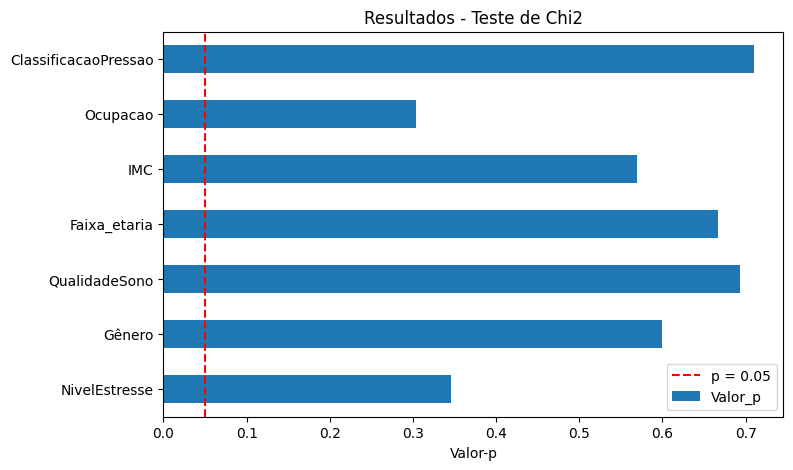

In [83]:
# Visualização gráfica dos resultados

grafico_resultados(df_tabelas_chi2, "Teste de Chi2")

Observação: não houve diferenças significativas para o nível de significância de 5% (p > 0.05) para nenhuma das colunas categoricas.

#### Verificando medidas de associação a partir do coeficiente de Spearman

Essa medida de associação serve para medir o quanto as variáveis estão correlacionadas.

In [86]:
# Coeficiente de Spearman

resultados_correlacao = df_sono_parquet.select_dtypes("category").apply(lambda coluna: coluna.cat.codes).corr(method="spearman", numeric_only=False)

resultados_correlacao

,Gênero,Ocupacao,QualidadeSono,NivelEstresse,IMC,DisturbioSono,Faixa_etaria,ClassificacaoPressao
Gênero,1.000000,0.096455,0.110904,0.022378,0.012908,-0.050449,-0.021839,0.000254
Ocupacao,0.096455,1.000000,0.060114,-0.032819,0.054332,0.036136,0.037504,0.034544
QualidadeSono,0.110904,0.060114,1.000000,-0.032859,0.046549,-0.021803,0.018634,-0.009781
NivelEstresse,0.022378,-0.032819,-0.032859,1.000000,0.053813,0.048772,0.075967,0.081630
IMC,0.012908,0.054332,0.046549,0.053813,1.000000,0.071411,0.028053,0.398654
DisturbioSono,-0.050449,0.036136,-0.021803,0.048772,0.071411,1.000000,-0.045509,-0.039762
Faixa_etaria,-0.021839,0.037504,0.018634,0.075967,0.028053,-0.045509,1.000000,0.718362
ClassificacaoPressao,0.000254,0.034544,-0.009781,0.081630,0.398654,-0.039762,0.718362,1.000000


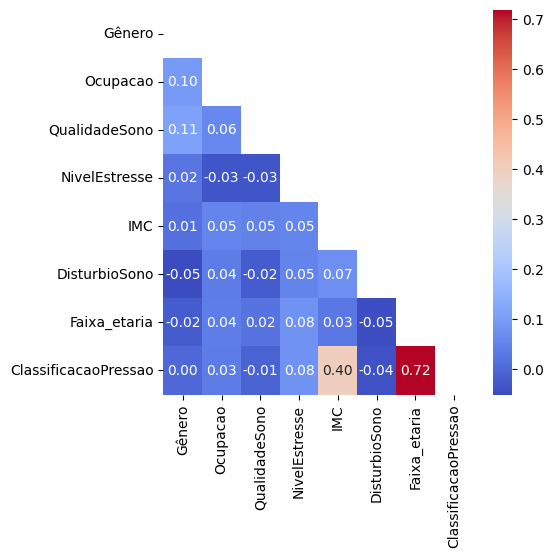

In [87]:
# Visualização gráfica dos resultados

matriz = np.triu(resultados_correlacao)

fig, ax = plt.subplots(figsize = (5, 5))

sns.heatmap(resultados_correlacao, mask=matriz, annot=True, fmt=".2f", ax=ax, cmap="coolwarm");

Observação: verificando as correlações, o maior resultado apresentado é de **faixa etária e pressão arterial (0.72)**, onde, conforme verificamos no gráfico de distribuição apresentado anteriormente, conforme se aumentava a idade, aumentava-se também a proporção de pessoas com pressão arterial mais alta. Esse resultado nos permitiu identificar que **idosos** eram predominantes na classificação de **pré-hipertensos e hipertensos** (**38.2 e 52.4%, respectivamente**).

O outro mais notável é o de IMC com a pressão arterial, onde vimos um aumento proporcional: conforme se aumenta o IMC, maior a proporção de pessoas com pressão arterial mais alta. Conforme explicado anteriormente também, pessoas com **IMC obeso** tem uma proporção expressiva para **pre-hipertensão e hipertensão** (**57.4 e 66.7%, respectivamente**)